In [39]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
import random
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

In [40]:
!wget https://www.dropbox.com/s/8l7ced95mb4k9ds/dataAll.txt
!wget https://www.dropbox.com/s/jad0ciovllm7y2y/data1.txt
!wget https://www.dropbox.com/s/mnzqvzttfan3r3f/dataHoldout.txt

--2021-10-29 19:51:17--  https://www.dropbox.com/s/8l7ced95mb4k9ds/dataAll.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8l7ced95mb4k9ds/dataAll.txt [following]
--2021-10-29 19:51:17--  https://www.dropbox.com/s/raw/8l7ced95mb4k9ds/dataAll.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc050f8fbdd7397ff51eb22ffdcd.dl.dropboxusercontent.com/cd/0/inline/BY-gTc2Xc1q3wpIQfBPsv7Bvnw7KBDVZw9w1OWcyqkRS_aEpDegvz81dSYI4eB04SUnc348VLAAlQpp0Ec5isGGEbp1RGOzWXqsq0rVAiuBsaMKQCc3aYsSAdkEhuYHU2aMzfQ1yRt2a_a6Y0kOVM7-N/file# [following]
--2021-10-29 19:51:17--  https://uc050f8fbdd7397ff51eb22ffdcd.dl.dropboxusercontent.com/cd/0/inline/BY-gTc2Xc1q3wpIQfBPsv7Bvnw7KBDVZw9w1OWcyqkRS_aEpDegvz81dSYI4eB04SUnc348VLAAlQpp0Ec5isGGEbp1RG

In [41]:
class Neuronio:
  #As variáveis do neurônio
  #(Aqui ficam os elementos gerais da classe)
  #(Para acessá-las, use self.[variável])
  bias = -1
  degrau = 0
  taxa_aprendizado = 0.1
  taxa_inicial = [-0.5, 0.5]

  def __init__(self, exemplos):
    #As variáveis dos exemplos
    #(Aqui ficam os elementos individuais de cada objeto)
    
    self.exemplos=exemplos
    '''
    Embaralhando os dados em função da separação dos dados para o método Holdout
    tendo em vista que não atrapalará nos resultados das outras questões:
    '''
    np.random.shuffle(self.exemplos)

  
    #Extraindo os resultados esperados
    self.resultados_esperados = np.zeros(len(self.exemplos))
    for i in range(len(self.exemplos)):
      self.resultados_esperados[i] = self.exemplos[i][-1]

    #Agora criaremos um outro array com o bias no ínicio e sem o valor esperado
    self.exemplos_bias = np.zeros_like(self.exemplos, dtype=np.float64)
    
    for i in range(len(self.exemplos)):
      for j in range(len(self.exemplos[i])):
        self.exemplos_bias[i][0] = self.bias
        self.exemplos_bias[i][1] = self.exemplos[i][0]
        self.exemplos_bias[i][2] = self.exemplos[i][1]

      
    self.ajustes = 0
    #variável auxiliar para contar os ajustes
    self.aux = 0
    self.epocas = 0
    self.resultados_algoritmo = np.zeros(len(self.exemplos_bias))

    #Variáveis auxiliares para o método holdout:
    self.exemplos_treinamento =self.exemplos[:int(len(self.exemplos)*70/100)]
    self.exemplos_teste = self.exemplos[int(len(self.exemplos)*70/100):]

    self.exemplos_bias_treinamento =self.exemplos_bias[:int(len(exemplos)*70/100)]
    self.exemplos_bias_teste = self.exemplos_bias[int(len(exemplos)*70/100):]

    self.resultados_algoritmo_treinamento = np.zeros(len(self.exemplos_bias_treinamento))
    self.resultados_algoritmo_teste = np.zeros(len(self.exemplos_bias_teste))

    self.resultados_esperados_treinamento =self.resultados_esperados[:int(len(self.exemplos)*70/100)]
    self.resultados_esperados_teste = self.resultados_esperados[int(len(self.exemplos)*70/100):]

    #Definindo o tamanho da lista de pesos
    self.pesos = np.zeros(len(self.exemplos_bias[0]), dtype=np.float64)

    for i in range(len(self.pesos)):
        self.pesos[i] = random.uniform(-0.5,0.5)

    #PESOS DE TESTE
    #self.pesos = np.array([-0.5441,0.5562,-0.4074])

    print("Pesos iniciais:")
    m = np.array([self.pesos])
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)


  def ativacao_degrau(self,u):
    '''
    Função de Ativação Degrau:
    (degrau = θ)
    Se u for maior ou igual a θ, retorna 1
    Caso contrário, retorna 0
    '''
    if(u >= self.degrau):
      return 1
    else:
      return 0


  def teste(self):
    '''
    Precisamos testar se os valores coincidem com o gabarito
    retorna: 
    - True,  se coincidir com o gabarito
    - False, se não coincidir 
    '''
    j = 0
    for i in self.exemplos_bias:
      #u = bias*pesos[0] + x1*pesos[1]... + xn*pesos[n]
      u = i[0]*self.pesos[0]+i[1]*self.pesos[1]+i[2]*self.pesos[2]
      self.resultados_algoritmo[j] = self.ativacao_degrau(u)        
      j +=1

    for i in range(len(self.resultados_algoritmo)):
      if(self.resultados_algoritmo[i] != self.resultados_esperados[i]):
          return False
    return True

  def ajuste(self):
    '''
    Faz o ajuste de pesos usando a Regra Delta
    '''
  
    self.aux = 0
    for i in range(len(self.exemplos_bias)):
      for j in range(len(self.pesos)):
        #Regra Delta
        erro = self.resultados_esperados[i] - self.resultados_algoritmo[i]
        self.pesos[j] = self.pesos[j] + self.taxa_aprendizado*erro*self.exemplos_bias[i][j]
      
      # Se o erro for diferente de zero, significa que os resultados não convergiram
      # Portanto, os pesos precisam ser atualizados

    
      if (erro != 0):
        self.ajustes +=1
        self.aux +=1
        m = np.array([self.pesos])

    
    #Print de informações
    print("Na época:",self.epocas,"Houve",self.aux,"ajuste(s)")
    print("Pesos ajustados:")
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)
      
    

  def treinamento(self):
    '''
    Treina o algoritmo até a convergência
    '''
    
    while (not self.teste()):
      self.epocas += 1
      self.ajuste()
      
    
    #Na última época, o self.teste retorna True, e portanto o while não é ativado
    #Os pesos estão certos, mas é preciso adicionar 1 ao contador de épocas
    self.epocas += 1

    #Em um problema com convergência, A última época sempre tem 0 ajustes
    print("Na época:",self.epocas,"Houve",0,"ajuste(s)")

    print('---')    
    print("Total de Ajustes:", self.ajustes)
    print("Total de Épocas:", self.epocas)
    print("Pesos finais:")
    m = np.array([self.pesos])
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)

  #Funções para o método Holdout:

  def comparacao_treinamento(self):
    '''
    Testando os valores do gabarito com o treinamento:
    '''
    j = 0
    for i in self.exemplos_bias_treinamento:
      #u = bias*pesos[0] + x1*pesos[1]... + xn*pesos[n]
      u = i[0]*self.pesos[0]+i[1]*self.pesos[1]+i[2]*self.pesos[2]
      self.resultados_algoritmo_treinamento[j] = self.ativacao_degrau(u)        
      j +=1

    for i in range(len(self.resultados_algoritmo_treinamento)):
      if(self.resultados_algoritmo_treinamento[i] != self.resultados_esperados_treinamento[i]):
          return False
    return True

      #Treinando o neurônio com 70% dos dados
  def treinamento_holdout(self):

    self.epocas=0
    for i in range(100):
      self.comparacao_treinamento()
      self.epocas += 1
      self.ajuste_holdout()
      
    print("Na época:",self.epocas,"Houve",0,"ajuste(s)")

    print('---')    
    print("Total de Ajustes:", self.ajustes)
    print("Total de Épocas:", self.epocas)
    print("Pesos finais:")
    m = np.array([self.pesos])
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)

  #função de ajuste de treinamento:
  def ajuste_holdout(self):
    '''
    Faz o ajuste de pesos usando a Regra Delta
    '''
  
    self.aux = 0
    for i in range(len(self.exemplos_bias_treinamento)):
      for j in range(len(self.pesos)):
        #Regra Delta
        erro = self.resultados_esperados_treinamento[i] - self.resultados_algoritmo_treinamento[i]
        self.pesos[j] = self.pesos[j] + self.taxa_aprendizado*erro*self.exemplos_bias_treinamento[i][j]
    
      if (erro != 0):
        self.ajustes +=1
        self.aux +=1
        m = np.array([self.pesos])

    
    #Print de informações
    print("Na época:",self.epocas,"Houve",self.aux,"ajuste(s)")
    print("Pesos ajustados:")
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)
      
      #Função de teste para os 20% dos dados que não foram utilizados no treino
  def teste_holdout(self):
    '''
    Precisamos testar se os valores coincidem com o gabarito
    retorna: 
    - True,  se coincidir com o gabarito
    - False, se não coincidir 
    '''
    j = 0
    for i in self.exemplos_bias_teste:
      #u = bias*pesos[0] + x1*pesos[1]... + xn*pesos[n]
      u = i[0]*self.pesos[0]+i[1]*self.pesos[1]+i[2]*self.pesos[2]
      self.resultados_algoritmo_teste[j] = self.ativacao_degrau(u)        
      j +=1
      
    return self.resultados_algoritmo_teste

  
  def grafico(self):
    #coordenadas dos pontos + cor
    x = np.zeros(len(self.exemplos), dtype=np.float64)
    y = x.copy()
    cor = []

    for i in range(len(self.exemplos)):
      x[i] = self.exemplos[i][0]
      y[i] = self.exemplos[i][1]

      if(self.resultados_algoritmo[i] == 1):
        cor.append('blue')
      else:
        cor.append('red')

    #função da linha
    minimo = x.min() or y.min()
    maximo = x.max() and y.max()
    valor1 = self.pesos[0]/self.pesos[2]
    valor2 = self.pesos[1]/self.pesos[2]
    x2 = np.linspace(minimo -1,maximo + 1, 100)
    y2 = valor1 - valor2*x2    

    #gráfico em sí
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.rcParams['figure.dpi'] = 100

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.scatter(x,y, marker='o',color=cor)
    plt.plot(x2, y2)



    
  def getPesos(self):
     return self.pesos
  
  def getExemplos_Bias(self):
     return self.exemplos_bias
  

  def getResultados_Algoritmo(self):
     return self.resultados_algoritmo



#Parte 3: Validação Holdout e problema não linearmente separável

##Representação visual: 

##Treinamento e teste:

In [42]:
array_ho = np.fromfile("/content/dataHoldout.txt")
array_ho = array_ho.ravel()
'''
O array vem na forma (N,1), N = número de dados total.
Para organizar por cada exemplo, precisamos mudar a forma da array.
Cada exemplo deve ter o formato [x1,x2,yd], pois são 3 dados para cada
Então o array deve ficar com 3 colunas.
O número de linhas deve ser N/colunas.
'''
colunas = 3
array_ho = array_ho.reshape(len(array_ho)//colunas, colunas)
exemplo = np.array([[2,2,1],[4,4,0]])
Teste1=Neuronio(array_ho)

Pesos iniciais:
╒══════════╤═════════════╤══════════╕
│     bias │          x1 │       x2 │
╞══════════╪═════════════╪══════════╡
│ 0.446192 │ 0.000361215 │ 0.353167 │
╘══════════╧═════════════╧══════════╛


In [43]:
Teste1.treinamento_holdout()

Na época: 1 Houve 162 ajuste(s)
Pesos ajustados:
╒══════════╤═══════════╤══════════╕
│     bias │        x1 │       x2 │
╞══════════╪═══════════╪══════════╡
│ -10.1538 │ -0.952168 │ -3.40452 │
╘══════════╧═══════════╧══════════╛
Na época: 2 Houve 426 ajuste(s)
Pesos ajustados:
╒═════════╤══════════╤══════════╕
│    bias │       x1 │       x2 │
╞═════════╪══════════╪══════════╡
│ 32.4462 │ -30.8293 │ -30.7674 │
╘═════════╧══════════╧══════════╛
Na época: 3 Houve 134 ajuste(s)
Pesos ajustados:
╒═════════╤══════════╤══════════╕
│    bias │       x1 │       x2 │
╞═════════╪══════════╪══════════╡
│ 19.0462 │ -30.5091 │ -30.6646 │
╘═════════╧══════════╧══════════╛
Na época: 4 Houve 133 ajuste(s)
Pesos ajustados:
╒═════════╤══════════╤══════════╕
│    bias │       x1 │       x2 │
╞═════════╪══════════╪══════════╡
│ 5.74619 │ -30.1418 │ -30.5414 │
╘═════════╧══════════╧══════════╛
Na época: 5 Houve 106 ajuste(s)
Pesos ajustados:
╒══════════╤══════════╤══════════╕
│     bias │       x1 │       

In [44]:
#Resultados verdadeiros do conjunto teste:
Teste1.resultados_esperados_teste

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [45]:
#Resultados previstos do conjunto teste:
Teste1.teste_holdout()

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

##Metricas:

###**1.** Matriz confusão

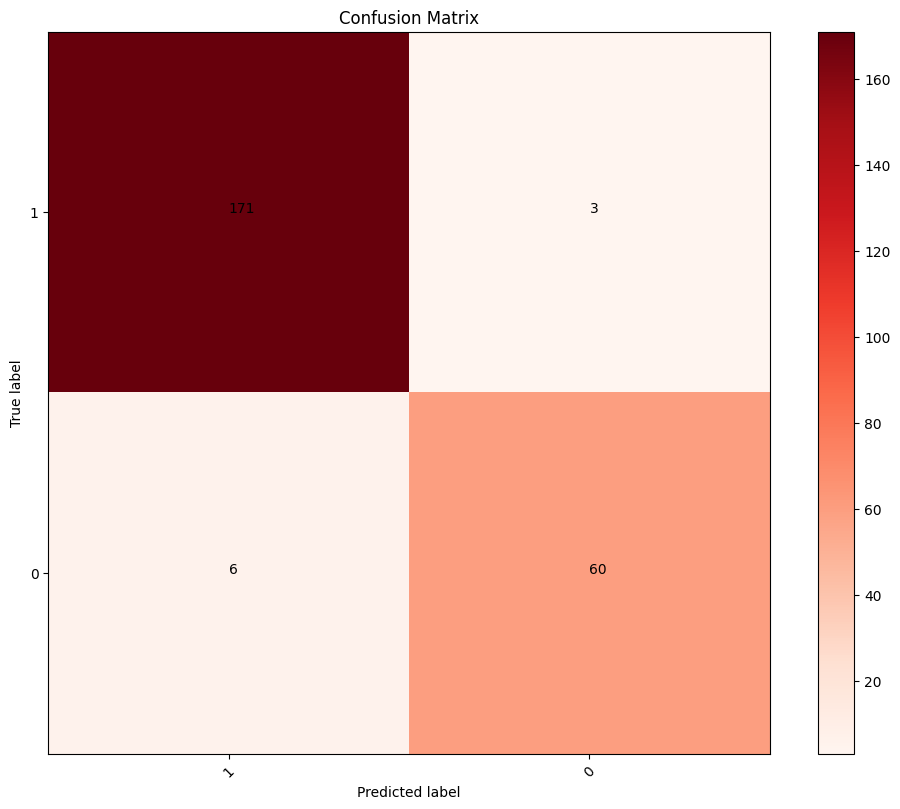

In [46]:
cm = confusion_matrix(Teste1.resultados_esperados_teste, Teste1.resultados_algoritmo_teste)
cmap=plt.cm.Reds
normalize = False
classes =  [1,0]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt))

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Métricas gerais:

In [47]:
print("----------- classification report ------------\n\n",classification_report(Teste1.resultados_esperados_teste, Teste1.teste_holdout()))
print("----------- confusion matrix ------------\n\n",confusion_matrix(Teste1.resultados_esperados_teste, Teste1.resultados_algoritmo_teste))

precision=precision_score(Teste1.resultados_esperados_teste, Teste1.teste_holdout())
recall=recall_score(Teste1.resultados_esperados_teste, Teste1.teste_holdout())
f1=f1_score(Teste1.resultados_esperados_teste, Teste1.teste_holdout())
accuracy=accuracy_score(Teste1.resultados_esperados_teste, Teste1.teste_holdout())


----------- classification report ------------

               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       174
         1.0       0.95      0.91      0.93        66

    accuracy                           0.96       240
   macro avg       0.96      0.95      0.95       240
weighted avg       0.96      0.96      0.96       240

----------- confusion matrix ------------

 [[171   3]
 [  6  60]]


###**2.** Acurácia: 

In [48]:
accuracy_score(Teste1.resultados_esperados_teste, Teste1.teste_holdout())

0.9625

### **3.**

In [49]:
#Precisão  
precision_score(Teste1.resultados_esperados_teste, Teste1.teste_holdout())

0.9523809523809523

In [50]:
#Revocação
recall_score(Teste1.resultados_esperados_teste, Teste1.teste_holdout())

0.9090909090909091

In [52]:
#F1 Score
f1_score(Teste1.resultados_esperados_teste, Teste1.teste_holdout())

0.9302325581395349

##**4.**

###A partir das métricas e da matriz de confusão é notável que apesar de não ser um problema linearmente separável, ainda obtivemos uma acurácia alta entre 95-98%. Isso se dá pela tecinca de holdout, aonde a maior parte dos dados foram utilizados para o treinamento, e temos certeza de que o neuronio está generalizando pois a acurácia é medida com 30% dos dados, que não foram utilizados no treinamento.

###Considerando também as outras métricas como F1 score, revocação e precisão, podemos aferir que a validação pelo método holdout foi uma boa solução para o problema.